<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.047803,77.827356,58.392335,0.000380,168.267874,168.267395,0.000479
1,0.0,1.0,40.497054,99.088838,97.989631,-0.000336,247.575187,247.575526,-0.000339
2,0.0,2.0,72.626003,30.530941,74.824628,0.000723,187.982295,187.981363,0.000932
3,0.0,3.0,34.237219,89.654097,31.747669,0.000070,165.639055,165.639001,0.000054
4,0.0,4.0,47.782929,96.106888,52.242394,0.000460,206.132671,206.132269,0.000402
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.736770,50.826896,57.705691,-0.000269,212.269088,212.269592,-0.000504
59996,999.0,56.0,75.418133,46.306483,81.282957,-0.000559,213.007014,213.007730,-0.000716
59997,999.0,57.0,33.921308,74.551539,67.006699,0.000634,185.480179,185.479340,0.000839
59998,999.0,58.0,38.511623,38.549204,88.663303,-0.000612,175.723518,175.724050,-0.000532


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    22.047803  77.827356  58.392335  0.000380  168.267874   
      1.0    40.497054  99.088838  97.989631 -0.000336  247.575187   
      2.0    72.626003  30.530941  74.824628  0.000723  187.982295   
      3.0    34.237219  89.654097  31.747669  0.000070  165.639055   
      4.0    47.782929  96.106888  52.242394  0.000460  206.132671   
...                ...        ...        ...       ...         ...   
999.0 55.0   93.736770  50.826896  57.705691 -0.000269  212.269088   
      56.0   75.418133  46.306483  81.282957 -0.000559  213.007014   
      57.0   33.921308  74.551539  67.006699  0.000634  185.480179   
      58.0   38.511623  38.549204  88.663303 -0.000612  175.723518   
      59.0   22.538329  44.090002  62.151094 -0.002008  138.777417   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.267395  0.000479  
      1.0    247.575526 -0.000339  
      2.0    187.981363  0.000932  
      3.0    165.639001  0.000054  
      4.0    206.132269  0.000402  
...                 ...       ...  
999.0 55.0   212.269592 -0.000504  
      56.0   213.007730 -0.000716  
      57.0   185.479340  0.000839  
      58.0   175.724050 -0.000532  
      59.0   138.779171 -0.001754  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    22.047803  77.827356  58.392335  0.000380  168.267874   
      1.0    40.497054  99.088838  97.989631 -0.000336  247.575187   
      2.0    72.626003  30.530941  74.824628  0.000723  187.982295   
      3.0    34.237219  89.654097  31.747669  0.000070  165.639055   
      4.0    47.782929  96.106888  52.242394  0.000460  206.132671   
...                ...        ...        ...       ...         ...   
999.0 55.0   93.736770  50.826896  57.705691 -0.000269  212.269088   
      56.0   75.418133  46.306483  81.282957 -0.000559  213.007014   
      57.0   33.921308  74.551539  67.006699  0.000634  185.480179   
      58.0   38.511623  38.549204  88.663303 -0.000612  175.723518   
      59.0   22.538329  44.090002  62.151094 -0.002008  138.777417   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.267395  0.000479  
      1.0    247.575526 -0.000339  
      2.0    187.981363  0.000932  
      3.0    165.639001  0.000054  
      4.0    206.132269  0.000402  
...                 ...       ...  
999.0 55.0   212.269592 -0.000504  
      56.0   213.007730 -0.000716  
      57.0   185.479340  0.000839  
      58.0   175.724050 -0.000532  
      59.0   138.779171 -0.001754  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.047803,77.827356,58.392335,0.000380,168.267874,168.267395,0.000479
1,0.0,1.0,40.497054,99.088838,97.989631,-0.000336,247.575187,247.575526,-0.000339
2,0.0,2.0,72.626003,30.530941,74.824628,0.000723,187.982295,187.981363,0.000932
3,0.0,3.0,34.237219,89.654097,31.747669,0.000070,165.639055,165.639001,0.000054
4,0.0,4.0,47.782929,96.106888,52.242394,0.000460,206.132671,206.132269,0.000402
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.736770,50.826896,57.705691,-0.000269,212.269088,212.269592,-0.000504
59996,999.0,56.0,75.418133,46.306483,81.282957,-0.000559,213.007014,213.007730,-0.000716
59997,999.0,57.0,33.921308,74.551539,67.006699,0.000634,185.480179,185.479340,0.000839
59998,999.0,58.0,38.511623,38.549204,88.663303,-0.000612,175.723518,175.724050,-0.000532


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    22.047803  77.827356  58.392335  0.000380  168.267874   
      1.0    40.497054  99.088838  97.989631 -0.000336  247.575187   
      2.0    72.626003  30.530941  74.824628  0.000723  187.982295   
      3.0    34.237219  89.654097  31.747669  0.000070  165.639055   
      4.0    47.782929  96.106888  52.242394  0.000460  206.132671   
...                ...        ...        ...       ...         ...   
999.0 55.0   93.736770  50.826896  57.705691 -0.000269  212.269088   
      56.0   75.418133  46.306483  81.282957 -0.000559  213.007014   
      57.0   33.921308  74.551539  67.006699  0.000634  185.480179   
      58.0   38.511623  38.549204  88.663303 -0.000612  175.723518   
      59.0   22.538329  44.090002  62.151094 -0.002008  138.777417   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.267395  0.000479  
      1.0    247.575526 -0.000339  
      2.0    187.981363  0.000932  
      3.0    165.639001  0.000054  
      4.0    206.132269  0.000402  
...                 ...       ...  
999.0 55.0   212.269592 -0.000504  
      56.0   213.007730 -0.000716  
      57.0   185.479340  0.000839  
      58.0   175.724050 -0.000532  
      59.0   138.779171 -0.001754  

[60000 rows x 7 columns]

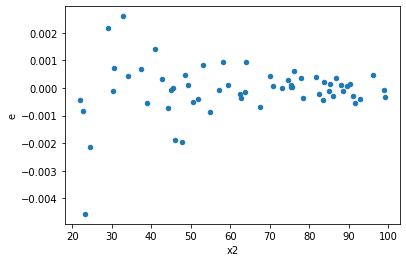

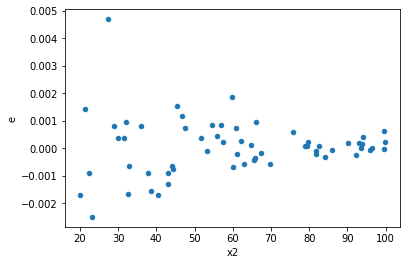

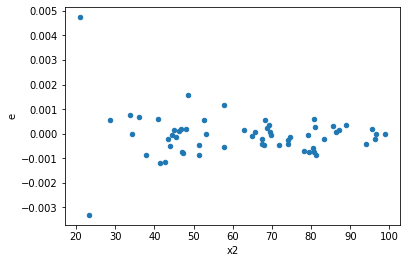

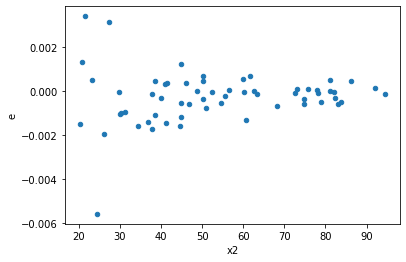

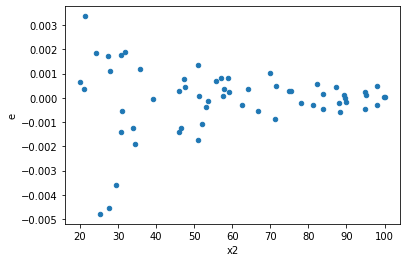

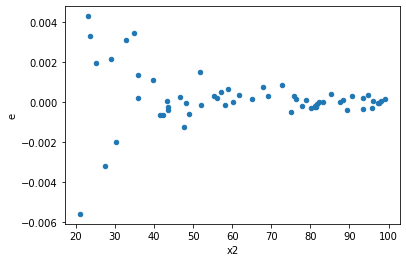

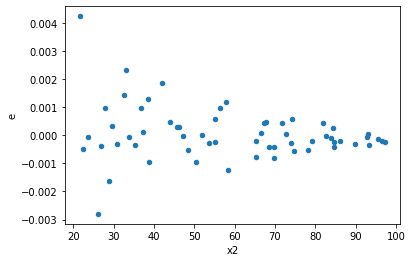

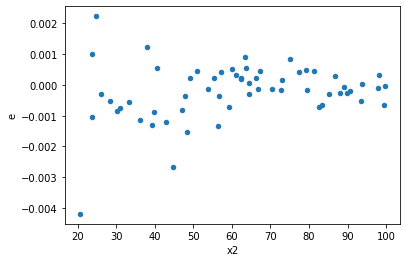

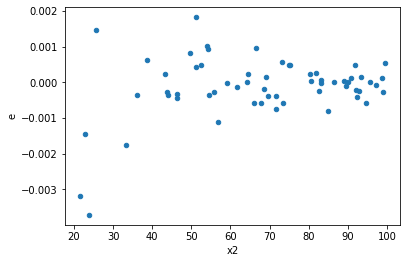

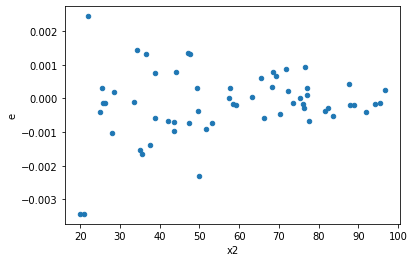

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,33.0,1.6593749180976105e-05,3.48138036497598e-05,7.901785324274336e-07,1.0549637469624182e-06,1.335095429284269,0.4465585635247,0.77672071823765,0.22327928176235,Reject001=1 : Homoscedasticity
3.0,21.0,33.0,1.0572648567622291e-05,6.225565534391583e-05,5.034594556010615e-07,1.886535010421692e-06,3.747143865178633,0.0006999947115158278,0.9996500026442421,0.0003499973557579139,Reject001=0 : Heteroscedasticity
5.0,27.0,27.0,1.6705636779336787e-05,5.1256606935460784e-05,6.187272881235846e-07,1.8983928494615105e-06,3.06822227805528,0.004864477179124416,0.9975677614104378,0.002432238589562208,Reject001=0 : Heteroscedasticity
6.0,20.0,34.0,1.0486461003276984e-05,3.5601080244851224e-05,5.243230501638492e-07,1.0470905954368007e-06,1.9970333082049099,0.07359159449344665,0.9632042027532767,0.03679579724672333,Reject001=1 : Homoscedasticity
7.0,26.0,28.0,1.2491591542211071e-05,3.248144490340355e-05,4.804458285465797e-07,1.160051603692984e-06,2.4145315346005045,0.024502150198322248,0.9877489249008389,0.012251075099161124,Reject001=1 : Homoscedasticity
8.0,32.0,22.0,1.780775559572505e-05,2.213449451493302e-05,5.564923623664078e-07,1.00611338704241e-06,1.8079554277511558,0.1506780416806539,0.924660979159673,0.07533902084032695,Reject001=1 : Homoscedasticity
9.0,28.0,26.0,2.1078608780514014e-05,2.4625421344394652e-05,7.528074564469291e-07,9.47131590169025e-07,1.2581325836479613,0.5589265109828112,0.7205367445085944,0.2794632554914056,Reject001=1 : Homoscedasticity
11.0,26.0,28.0,4.372491958290622e-06,0.0001261114970640737,1.6817276762656238e-07,4.503982038002632e-06,26.781874982303865,2.0694557179012918e-13,0.9999999999998965,1.0347278589506459e-13,Reject001=0 : Heteroscedasticity
12.0,25.0,29.0,1.2347314933472625e-05,3.353409603208795e-05,4.93892597338905e-07,1.1563481390375156e-06,2.3412947374954056,0.028962159228502093,0.985518920385749,0.014481079614251047,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,33.0,1.6593749180976105e-05,3.48138036497598e-05,7.901785324274336e-07,1.0549637469624182e-06,1.335095429284269,0.4465585635247,Reject001=1 : Homoscedasticity
1.0,32.0,22.0,4.740815920047903e-05,1.4180781881187487e-05,1.4815049750149697e-06,6.445809945994313e-07,0.4350852717135953,0.031270314881996865,Reject001=1 : Homoscedasticity
2.0,27.0,27.0,3.622466377958642e-05,9.066895199691054e-06,1.3416542140587563e-06,3.358109333218909e-07,0.25029618645627,0.000586566278281924,Reject001=0 : Heteroscedasticity
3.0,21.0,33.0,1.0572648567622291e-05,6.225565534391583e-05,5.034594556010615e-07,1.886535010421692e-06,3.747143865178633,0.0006999947115158278,Reject001=0 : Heteroscedasticity
4.0,31.0,23.0,9.68703111618274e-05,4.568750122135179e-06,3.1248487471557224e-06,1.9864130965805126e-07,0.06356829585395361,4.6926013512050266e-11,Reject001=0 : Heteroscedasticity
5.0,27.0,27.0,1.6705636779336787e-05,5.1256606935460784e-05,6.187272881235846e-07,1.8983928494615105e-06,3.06822227805528,0.004864477179124416,Reject001=0 : Heteroscedasticity
6.0,20.0,34.0,1.0486461003276984e-05,3.5601080244851224e-05,5.243230501638492e-07,1.0470905954368007e-06,1.9970333082049099,0.07359159449344665,Reject001=1 : Homoscedasticity
7.0,26.0,28.0,1.2491591542211071e-05,3.248144490340355e-05,4.804458285465797e-07,1.160051603692984e-06,2.4145315346005045,0.024502150198322248,Reject001=1 : Homoscedasticity
8.0,32.0,22.0,1.780775559572505e-05,2.213449451493302e-05,5.564923623664078e-07,1.00611338704241e-06,1.8079554277511558,0.1506780416806539,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    570
Reject001=1 : Homoscedasticity      430
Name: Result_test, dtype: int64